In [20]:
# Importar Librerias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [3]:
df = pd.read_csv('../data/processed/processed_df.csv', index_col=0)

In [4]:
# Paso las columnas a minúsculas por comodidad
df.columns = df.columns.str.lower()
df.head()

,political lean,score,num of comments,capitalism,socialism,democrats,democraticsocialism,socialdemocracy,progressive,alltheleft,liberal,feminisms,communist,radicalfeminism,libertarian,conservatives,republicans,anarchocapitalism
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,7,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Cambio el nombre de political lean a target
df.rename(columns={'political lean':'target'},inplace=True)
df.head()

,target,score,num of comments,capitalism,socialism,democrats,democraticsocialism,socialdemocracy,progressive,alltheleft,liberal,feminisms,communist,radicalfeminism,libertarian,conservatives,republicans,anarchocapitalism
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,7,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.drop(columns=['score','num of comments'],inplace=True)

In [7]:
# Separo el DF en Train y Test, me guardo el Test para las pruebas
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

print('Train',df_train.shape)
print('Test',df_test.shape)

Train (8612, 16)
Test (4242, 16)


In [8]:
X = df_train.drop(columns='target')
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (6889, 15)
X_test (1723, 15)
y_train (6889,)
y_test (1723,)


In [9]:
rfc = RandomForestClassifier(max_features=1, n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=1, n_estimators=10)

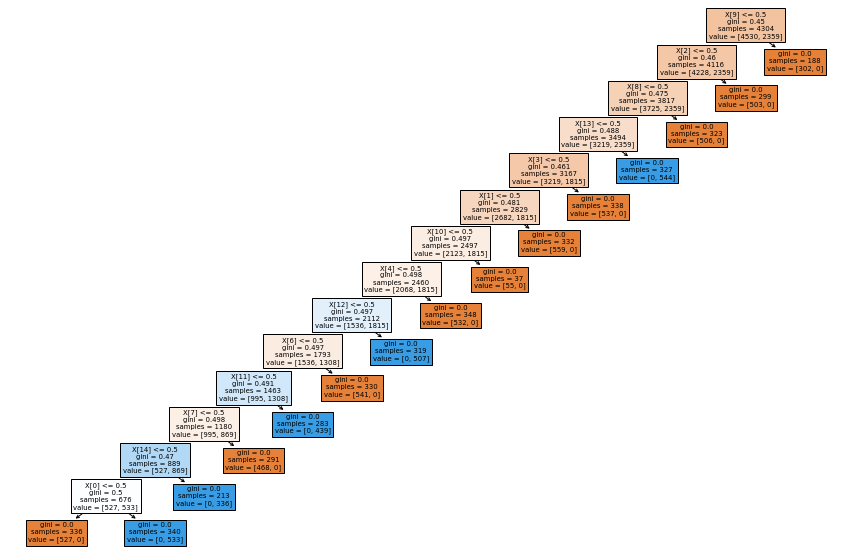

In [11]:
from sklearn import tree

plt.figure(figsize=(15,10))
for i in range(len(rfc.estimators_)):
    tree.plot_tree(rfc.estimators_[i],filled=True)

In [10]:
rfc.feature_importances_

pd.DataFrame({'features':X_train.columns, 'importances':rfc.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
0,capitalism,0.154965
12,conservatives,0.136079
13,republicans,0.123024
11,libertarian,0.111035
6,alltheleft,0.069783
14,anarchocapitalism,0.062364
4,socialdemocracy,0.054818
3,democraticsocialism,0.054626
2,democrats,0.051163
8,feminisms,0.047753


In [12]:
y_pred = rfc.predict(X_test)

In [14]:
accuracy_score(y_test,rfc.predict(X_test))

1.0

In [17]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_pred, y_test))
    print( "Balanced Accuracy : ",balanced_accuracy_score(y_test, y_pred))
    cm=confusion_matrix(y_pred , y_test)
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative',  'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Positive'], fontsize=16)
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1064
           1       1.00      1.00      1.00       659

    accuracy                           1.00      1723
   macro avg       1.00      1.00      1.00      1723
weighted avg       1.00      1.00      1.00      1723

Balanced Accuracy :  1.0


<Figure size 432x288 with 0 Axes>

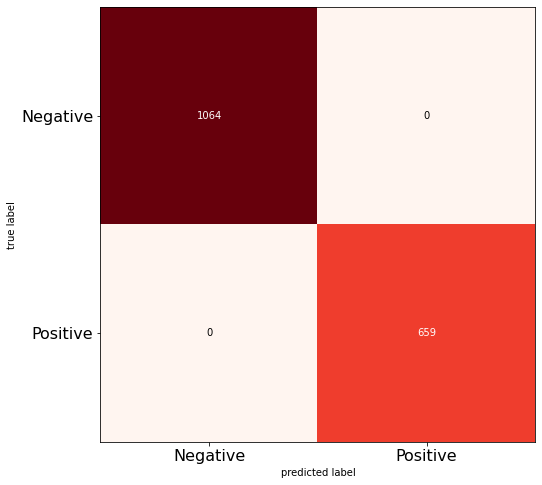

In [21]:
from sklearn.metrics import roc_curve, auc
dtc= RandomForestClassifier()
dtc.fit(X_train, y_train)
model_Evaluate(dtc)

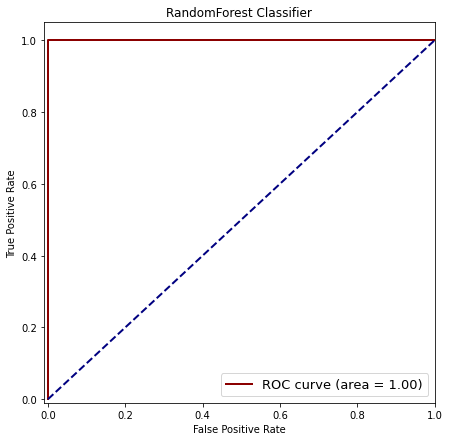

In [22]:
pred_dtc = dtc.predict_proba(X_test)[:,1]
fpr_dtc,tpr_dtc,_ = roc_curve(y_test.values,pred_dtc)
roc_auc_dtc = auc(fpr_dtc,tpr_dtc)


f, axes = plt.subplots(1, 1,figsize=(7,7))
axes.plot(fpr_dtc, tpr_dtc, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_dtc))
axes.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes.set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes.set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'RandomForest Classifier')
axes.legend(loc='lower right', fontsize=13)

In [25]:
X_df_test = df_test.drop(columns='target')
y_df_test = df_test['target']
print(X_df_test.shape)
print(y_df_test.shape)

(4242, 15)
(4242,)


In [24]:
rfc.score(X_df_test,y_df_test)

1.0